In [51]:
import tensorflow
import numpy as np
import pandas as pd
import os
import tensorflow.keras as keras
zip_file=keras.utils.get_file(
    fname="gamma_angle_position_5deg_xy.h5",
    origin="https://zenodo.org/record/846388/files/gamma_angle_position_5deg_xy.h5?download=1",
    extract=True

)
dirnam=os.path.join(os.path.dirname(zip_file), "gamma_angle_position_5deg_xy.h5")
import h5py
#data imported

In [52]:
import matplotlib.pyplot as plt
def extract_data(n):
  windows=np.empty((12,12,1))
  for i in range(n):
    window = (np.array(h5py.File(zip_file)["layer_1"][i]))
    #print(window.reshape(1,12,12).shape)
    #window=window.reshape(1,12,12)
    windows=np.dstack((windows, window))
  return windows
#data check

In [53]:
def max_loc(layer):
    layer_flat_2D=layer.reshape(layer.shape[0],layer.shape[1]*layer.shape[2])
    maxx = np.argmax(layer_flat_2D,axis=1)%layer.shape[2]
    maxy = np.argmax(layer_flat_2D,axis=1)//layer.shape[2]
    max = np.stack([maxx,maxy],axis=1)
    return max
    #maxes = Layer_1_data_preprocessed.take(max)

In [54]:
def extract_message(layers):
    max_coor = max_loc(layers)
    print(max_coor.shape)
    e_message = np.zeros((1,3,3))
    message = np.empty((500000,3,3))
    print(max_coor[0,0])
    for index in range(max_coor.shape[0]):
        if(max_coor[index,0] > 1 and max_coor[index,1] > 1 and  max_coor[index,0] < layers.shape[2]-2 and max_coor[index,1] < layers.shape[1]-2):
            test = np.array(layers[index,max_coor[index,1]-1:max_coor[index,1]+2,max_coor[index,0]-1:max_coor[index,0]+2])
        else:
            test = e_message
        if index == 12 : 
            print(test)
        message[index] =  test
    return message
#first gnn model input extraction

In [55]:

x=h5py.File(zip_file)
layer_0_data = (np.array(h5py.File(zip_file)["layer_0"][:]))
layer_1_data = (np.array(h5py.File(zip_file)["layer_1"][:]))
layer_2_data = (np.array(h5py.File(zip_file)["layer_2"][:]))
energy=(np.array(h5py.File(zip_file)["energy"]))
order = np.arange(0, energy.shape[0])
np.random.shuffle(order)
energy=energy.reshape(energy.shape[0])
energy_s = energy[order]
layer_0_data_s = layer_0_data[order] 
layer_1_data_s = layer_1_data[order] 
layer_2_data_s = layer_2_data[order] 


nottobe_merged = max_loc(layer_1_data_s) == max_loc(layer_1_data)

print(layer_0_data.shape)

nrm_e=np.max(energy)


#data classes imported

(500000, 3, 96)


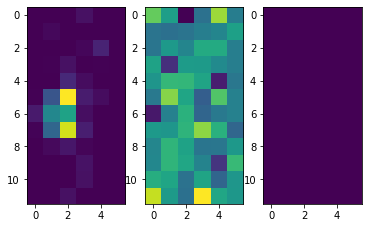

In [56]:
fig, ax=plt.subplots(1,3)
from matplotlib.colors import LogNorm
ax[0].imshow(np.array(h5py.File(zip_file)["layer_2"][111]))
ax[2].imshow(layer_2_data_st[111])
ax[1].imshow(noise_l2[111])
#layer, noise, noise added layer

In [57]:
nottobe_merged = np.logical_and.reduce(nottobe_merged, axis = 1)
print(np.sum(nottobe_merged))

#tobe_merged = np.logical_not( tobe_merged)

56014



layer1_flat_2D=np.reshape(Layer_1_data_preprocessed,[500000,144])
maxx = np.argmax(layer1_flat_2D,axis=1)//12
maxy = np.argmax(layer1_flat_2D,axis=1)%12
max = np.stack([maxy,maxx],axis=1)
maxes = Layer_1_data_preprocessed.take(max)

In [58]:
rng = np.random.default_rng()
noise_l0 = rng.normal(0,167,layer_0_data.shape[0]*layer_0_data.shape[1]*layer_0_data.shape[2])
noise_l0 = noise_l0.reshape(layer_0_data.shape[0],layer_0_data.shape[1],layer_0_data.shape[2])
mask = np.zeros([layer_0_data.shape[1],layer_0_data.shape[2]])
layer_0_data_s[nottobe_merged] = mask
layer_0_data = layer_0_data + noise_l0
nrm_l0=np.max(layer_0_data)
layer_0_data[layer_0_data<0] = 0



noise_l1 = rng.normal(0,167,layer_1_data.shape[0]*layer_1_data.shape[1]*layer_1_data.shape[2])
noise_l1 = noise_l1.reshape(layer_1_data.shape[0],layer_1_data.shape[1],layer_1_data.shape[2])
mask = np.zeros([layer_1_data.shape[1],layer_1_data.shape[2]])
layer_1_data_s[nottobe_merged] = mask
layer_1_data = layer_1_data + noise_l1
nrm_l1=np.max(layer_1_data)
layer_1_data[layer_1_data<0] = 0

noise_l2 = rng.normal(0,167,layer_2_data.shape[0]*layer_2_data.shape[1]*layer_2_data.shape[2])
noise_l2 = noise_l2.reshape(layer_2_data.shape[0],layer_2_data.shape[1],layer_2_data.shape[2])
mask = np.zeros([layer_2_data.shape[1],layer_2_data.shape[2]])
layer_2_data_s[nottobe_merged] = mask
layer_2_data = layer_2_data + noise_l2
nrm_l2=np.max(layer_2_data)
layer_2_data[layer_2_data<0] = 0

#energy = np.stack((energy, energy_s*nottobe_merged),axis=1)


Layer_0_data_preprocessed=layer_0_data/nrm_l0
Layer_1_data_preprocessed=layer_1_data/nrm_l1
Layer_2_data_preprocessed=layer_2_data/nrm_l2
energy = energy / nrm_e
#data, noise and preprocessing 

In [59]:
messages_l1_gnn = extract_message(Layer_1_data_preprocessed)
messages_l2_gnn = extract_message(Layer_2_data_preprocessed)
print(messages_l2_gnn.shape)
messages_l0_gnn = extract_message(Layer_0_data_preprocessed)
#first gnn inputs

(500000, 2)
6
[[0.0082874  0.02141695 0.01040888]
 [0.02270531 0.774475   0.07478572]
 [0.01121738 0.06996775 0.0210808 ]]
(500000, 2)
3
[[0.         0.         0.        ]
 [0.01933988 0.03351537 0.        ]
 [0.00260954 0.         0.        ]]
(500000, 3, 3)
(500000, 2)
53
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [60]:
layer_0_data_st = layer_0_data + layer_0_data_s 
layer_1_data_st = layer_1_data + layer_1_data_s 
layer_2_data_st = layer_2_data + layer_2_data_s 
mask = np.zeros([layer_0_data.shape[1],layer_0_data.shape[2]])
layer_0_data_st[nottobe_merged]=mask
mask = np.zeros([layer_1_data.shape[1],layer_1_data.shape[2]])
layer_1_data_st[nottobe_merged]=mask
mask = np.zeros([layer_2_data.shape[1],layer_2_data.shape[2]])
layer_2_data_st[nottobe_merged]=mask
layer_0_data_st[layer_0_data_st<0]=0
layer_1_data_st[layer_1_data_st<0]=0
layer_2_data_st[layer_2_data_st<0]=0


energy_st = energy+energy_s
mask= np.zeros(1)
energy_st[nottobe_merged]=mask
#layers with 2 particles arranged

In [61]:
stacked_values=np.where(nottobe_merged==True)
stacked_values=np.array(stacked_values)


def extract_particles(layers):
    max_coor = max_loc(layers)
    e_message = np.zeros((1,3,3))
    message = np.empty((500000,3,3))
    layers_clone = np.copy(layers)
    for index in range(max_coor.shape[0]):
        if((index in stacked_values)== False  and  (layers.shape[1]-2)>=max_coor[index,1]>0 and (layers.shape[2]-2)>=max_coor[index,0]>1 ):#for layer 1 and 2  
            test = np.array(layers_clone[index,max_coor[index,1]-1:max_coor[index,1]+2,max_coor[index,0]-1:max_coor[index,0]+2])
            layers_clone[index,max_coor[index,1], max_coor[index,0]]=0
        else:
            test = e_message
        message[index] =  test
    return message, layers_clone
#extracting multiple particles

In [62]:
particle0_1, layer_clone_0_1= extract_particles(layer_0_data_st)
particle0_2,_=extract_particles(layer_clone_0_1)

In [63]:
particle1_1, layer_clone_1_1=extract_particles(layer_1_data_st)
particle1_2, _= extract_particles(layer_clone_1_1)

In [64]:
particle2_1, layer_clone_2_1= extract_particles(layer_2_data_st)
particle2_2,_=extract_particles(layer_clone_2_1)

In [65]:
par01_pos=max_loc(layer_0_data_st)
par02_pos=max_loc(layer_clone_0_1)
par11_pos=max_loc(layer_1_data_st)
par12_pos=max_loc(layer_clone_1_1)
par21_pos=max_loc(layer_2_data_st)
par22_pos=max_loc(layer_clone_2_1)
#distance function R=(x^2+y^2)^(1/2) preference function
#baseline model with preferred energies having weight 1 and unpreferred having weight 0
#comparative models with with weights proportional to 1/R
#other elements like electromagnetic effects, mass-momentum of the particle, energy-path deviation relation
#other particles like muon and pion 
#particle physics phenomenon

In [66]:
layer_0_loc=np.stack((par01_pos, par02_pos), axis=1)
layer_1_loc=np.stack((par11_pos, par12_pos), axis=1)
layer_2_loc=np.stack((par21_pos, par22_pos), axis=1)

In [67]:
def empty(par):
    empty1=par==np.zeros((3,3))
    empty1=np.logical_and.reduce(empty1, axis = 2)
    empty1=np.array(np.where(empty1==True))
    empty1=empty1[0]
    empty1=set(empty1)
    return empty1
def intersect(layer1,layer2, layer3):
    intersect=layer1.union(layer2)
    return intersect
#intersection of empty data is found

In [68]:
layer_0_emp=empty(particle0_2)
layer_1_emp=empty( particle1_2)
layer_2_emp=empty(particle2_2)
excluded_data=intersect(layer_0_emp, layer_1_emp, layer_2_emp)
#excluded data

In [69]:
excluded_data=np.array([list(excluded_data)])
excluded_data.shape
included_data=[]
for index in range(particle0_1.shape[0]):
    if ((index in excluded_data)==False):
        included_data.append(index)
#included data

In [70]:
layer0_particles=np.stack((particle0_1,particle0_2), axis=1)
layer1_particles=np.stack((particle1_1,particle1_2), axis=1)
layer2_particles=np.stack((particle2_1,particle2_2), axis=1)
included_data=np.array([included_data])
#particles of same windows are grouped

In [71]:
print(included_data.shape)
layer0_particles=layer0_particles[included_data]
layer1_particles=layer1_particles[included_data]
layer2_particles=layer2_particles[included_data]
#included data where for every layer, there exist 2 particles

(1, 408834)


In [72]:
layer_0_loc=layer_0_loc[included_data]
layer_1_loc=layer_1_loc[included_data]
layer_2_loc=layer_2_loc[included_data]

In [73]:
print(layer_0_loc.shape)
print(layer0_particles.shape)
energy_st=energy_st[included_data]

(1, 408834, 2, 2)
(1, 408834, 2, 3, 3)


88.2974656860427

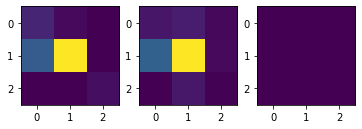

In [77]:
def layer_check(n):
    fig, ax=plt.subplots(1,3)
    ax[0].imshow(particle0_2[n])
    ax[1].imshow(particle1_2[n])
    ax[2].imshow(particle2_2[n])
layer_check(10)

In [45]:
def check_layer_0(ind):
    fig, ax=plt.subplots(1,3)
    ax[0].imshow(layer_0_data_st[ind], aspect="auto")
    ax[1].imshow(particle0_1[ind])
    print(max_loc(layer_0_data_st)[ind,1])
    ax[2].imshow(particle0_2[ind])
    print(particle0_1[ind], particle0_2[ind])
    print(max_loc(layer_0_data_st)[ind])
    print(max_loc(layer_clone_0_1)[ind])
def check_layer_2(ind):
    fig, ax=plt.subplots(1,3)
    ax[0].imshow(layer_2_data_st[ind], aspect="auto")
    ax[1].imshow(particle2_1[ind])
    print(max_loc(layer_2_data_st)[ind,1])
    ax[2].imshow(particle2_2[ind])
    print(particle2_1[ind], particle2_2[ind])
    print(max_loc(layer_2_data_st)[ind])
    print(max_loc(layer_clone_2_1)[ind])
def check_layer_1(int):
    fig, ax=plt.subplots(1,4)
    ax[0].imshow(particle1_1[int])
    ax[1].imshow(layer_1_data_st[int])
    ax[2].imshow(particle1_2[int])
    ax[3].imshow(layer_clone_1_1[int])
    print(max_loc(layer_1_data_st)[int])
    print(max_loc(layer_clone_1_1)[int])
    print(particle1_1[int])
    print(particle1_2[int])

In [152]:
print(layer_0_loc[0][0][0])
print(layer0_particles[0][0][0])
print(layer_1_loc[0][1][1])
l0_nr=np.copy(layer_0_loc)
l1_nr=np.copy(layer_1_loc)
l2_nr=np.copy(layer_2_loc)

[51  1]
[[7.34525188e+00 4.82481694e+01 7.04601804e+00]
 [1.28568972e+03 4.20997025e+03 3.83131621e+02]
 [5.10299499e-01 1.52808439e+02 1.02932452e+02]]
[5 5]


In [153]:
loc0_nrm=np.stack((l0_nr[0].T[0]/96,l0_nr[0].T[1]/3), axis=0).T
loc1_nrm=np.stack((l1_nr[0].T[0]/12,l1_nr[0].T[1]/12), axis=0).T
loc2_nrm=np.stack((l2_nr[0].T[0]/3,l2_nr[0].T[1]/12), axis=0).T

In [156]:
def distance_formula(layer1,layer2):
    

array([[0.53125   , 0.33333333],
       [0.55208333, 0.33333333]])

In [244]:
layer1_flat_2D=np.reshape(Layer_1_data_preprocessed,[500000,144])
maxx = np.argmax(layer1_flat_2D,axis=1)//12
maxy = np.argmax(layer1_flat_2D,axis=1)%12
max = np.stack([maxy,maxx],axis=1)
maxes = Layer_1_data_preprocessed.take(max)
print(maxx[0])
print(maxy[0])
print(Layer_1_data_preprocessed[0][5][6])
print(maxes.shape)
print(maxes[0])

5
6
0.7210057179529423
(500000, 2)
[0.         0.00139134]


In [245]:
flatten_layer_0=Layer_0_data_preprocessed.reshape(500000,3*96)
flatten_layer_1=Layer_1_data_preprocessed.reshape(500000,12*12)
flatten_layer_2=Layer_2_data_preprocessed.reshape(500000,6*12)
from random import randint

labels=list(range(500000))




#random_selection=np.array([x for x in range (500000) if x not in random])

for i in range(int(0.6*len(flatten_layer_0))):
  n=randint(0,499999)
  random.append(n)
  train_labels.append(energy[n])
  train_layer_0.append(flatten_layer_0[n])
  train_layer_1.append(flatten_layer_1[n])
  train_layer_2.append(flatten_layer_2[n])

In [246]:
from sklearn.model_selection import train_test_split
layer_0_train, layer_0_test, energy_train, energy_test,  layer_1_train,layer_1_test, layer_2_train, layer_2_test,= train_test_split(flatten_layer_0,  energy, flatten_layer_1, flatten_layer_2,  test_size=0.4, random_state=42)
layer_0_train_2D, layer_0_test_2D, energy_train, energy_test,  layer_1_train_2D,layer_1_test_2D, layer_2_train_2D, layer_2_test2D, messages_l1_gnn_train, messages_l1_gnn_test, messages_l2_gnn_train, messages_l2_gnn_test= train_test_split(Layer_0_data_preprocessed,  energy, Layer_1_data_preprocessed, Layer_2_data_preprocessed, messages_l1_gnn, messages_l2_gnn ,test_size=0.4, random_state=42)

KeyboardInterrupt: 

In [ ]:
print(layer_0_train_2D.shape)


def check_data(n):
  x=layer_0_train[n].sum()*np.max(layer_0_data)+layer_1_train[n].sum()*np.max(layer_1_data)+layer_2_train[n].sum()*np.max(layer_2_data)
  n=label0_train[n]
  print(x,energy[n])
check_data(5)

lbl_tr ==> labels of training

lbl_val==>labels of validation

l0_tr, l1_tr, l2_tr will be used in training and are chosen from previously splitted training data

l0_tr,l0_val,l1_tr,l1_val,l2_tr,l2_val,lbl_tr,lbl_val= train_test_split(layer_0_train,layer_1_train,layer_2_train, label0_train, test_size=0.2, random_state=42)
del(l0_tr,l0_val,l1_tr,l1_val,l2_tr,l2_val,lbl_tr,lbl_val)

In [ ]:

lc1_test=np.array([np.concatenate((layer_0_test, layer_1_test, layer_2_test),axis=1)  ])
lc1_train=np.array([np.concatenate((layer_0_train, layer_1_train, layer_2_train),axis=1)  ])
lc1_train=lc1_train.reshape(lc1_train.shape[1],lc1_train.shape[2])
lc1_test=lc1_test.reshape(lc1_test.shape[1],lc1_test.shape[2])


In [ ]:
print(lc1_test.shape) 
print(energy_test.shape)
print(lc1_train.shape)
print(energy_train.shape) 

test_layer_0 = np.array([flatten_layer_0[i] for i in range(len(flatten_layer_0)) if i not in random])
test_layer_1 = np.array([flatten_layer_1[i] for i in range(len(flatten_layer_0)) if i not in random])
test_layer_2 = np.array([flatten_layer_2[i] for i in range(len(flatten_layer_0)) if i not in random])

In [ ]:
def run_experiment(model, x_train, y_train):
    
    model.compile(
        optimizer=keras.optimizers.Adam(0.003),
        loss=keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")#,
        #metrics=tf.keras.metrics.BinaryAccuracy(),
    )
    
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=50, restore_best_weights=True
    )
    
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=50,
        batch_size=512,
        validation_split=0.2,
        callbacks=[early_stopping],
    )

    return history

In [ ]:
import keras.layers as layers
import tensorflow as tf
hidden_units = [1024, 512,64]





def dnn(hidden_units, num_classes, dropout_rate):
    inputs = layers.Input(shape=(144+(96*3)+72,), name="input_features")
    x = inputs
    for units in hidden_units:        
        x  = layers.Dense(units, activation=tf.nn.relu)(x)
        x  = layers.Dropout(rate=dropout_rate)(x)
    logits = layers.Dense(num_classes, name="output")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="dnn")


baseline_model = dnn(hidden_units, 1, 0)
baseline_model.summary()

In [ ]:
def cnn(hidden_units, num_classes, dropout_rate):
    inputs0 = layers.Input(shape=(3,96,1,), name="input_features_l0")
    inputs1 = layers.Input(shape=(12,12,1,), name="input_features_l1")
    inputs2 = layers.Input(shape=(12,6,1,), name="input_features_l2")
    cnn0 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs0)
    cnn0 = layers.Conv2D(64, 3, activation='relu', padding='same')(cnn0)
    #cnn0 = layers.Conv2D(128, 5, activation='relu', padding='same')(cnn0)
    cnn0 = layers.Flatten()(cnn0)
    inputs0_flat = layers.Flatten()(inputs0)
    cnn0Comb = layers.Concatenate()([cnn0,inputs0_flat])
    cnn1 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs1)
    cnn1 = layers.Conv2D(64, 3, activation='relu', padding='same')(cnn1)
    #cnn1 = layers.Conv2D(128, 5, activation='relu', padding='same')(cnn1)
    cnn1 = layers.Flatten()(cnn1)
    inputs1_flat = layers.Flatten()(inputs1)
    cnn1Comb = layers.Concatenate()([cnn1,inputs1_flat])
    cnn2 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs2)
    cnn2 = layers.Conv2D(64, 3, activation='relu', padding='same')(cnn2)  
    #cnn2 = layers.Conv2D(128, 5, activation='relu', padding='same')(cnn2)      
    cnn2 = layers.Flatten()(cnn2)
    inputs2_flat = layers.Flatten()(inputs2)
    cnn2Comb = layers.Concatenate()([cnn2,inputs2_flat])
    x =  layers.Concatenate()([cnn0Comb,cnn1Comb,cnn2Comb])
    for units in hidden_units:        
        x  = layers.Dense(units, activation=tf.nn.relu)(x)
        x  = layers.Dropout(rate=dropout_rate)(x)
    logits = layers.Dense(num_classes, name="output")(x)
    # Create the model.
    return keras.Model(inputs=(inputs0,inputs1,inputs2), outputs=logits, name="cnn")


In [ ]:
def gnn(hidden_units, num_classes, dropout_rate):
    inputs0 = layers.Input(shape=(3,96,1,), name="input_features_l0")
    inputs1 = layers.Input(shape=(3,3,1,), name="input_features_l1")
    inputs2 = layers.Input(shape=(3,3,1,), name="input_features_l2")
    cnn0 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs0)
    cnn0 = layers.Conv2D(64, 3, activation='relu', padding='same')(cnn0)
    #cnn0 = layers.Conv2D(128, 5, activation='relu', padding='same')(cnn0)
    cnn0 = layers.Flatten()(cnn0)
    inputs0_flat = layers.Flatten()(inputs0)
    cnn0Comb = layers.Concatenate()([cnn0,inputs0_flat])
    cnn1 = layers.Conv2D(32, 2, activation='relu', padding='same')(inputs1)
    #cnn1 = layers.Conv2D(64, 2, activation='relu', padding='same')(cnn1)
    #cnn1 = layers.Conv2D(128, 5, activation='relu', padding='same')(cnn1)
    cnn1 = layers.Flatten()(cnn1)
    inputs1_flat = layers.Flatten()(inputs1)
    cnn1Comb = layers.Concatenate()([cnn1,inputs1_flat])
    cnn2 = layers.Conv2D(32, 2, activation='relu', padding='same')(inputs2)
    #cnn2 = layers.Conv2D(64, 2, activation='relu', padding='same')(cnn2)  
    #cnn2 = layers.Conv2D(128, 5, activation='relu', padding='same')(cnn2)      
    cnn2 = layers.Flatten()(cnn2)
    inputs2_flat = layers.Flatten()(inputs2)
    cnn2Comb = layers.Concatenate()([cnn2,inputs2_flat])
    x =  layers.Concatenate()([cnn0Comb,cnn1Comb,cnn2Comb])
    for units in hidden_units:        
        x  = layers.Dense(units, activation=tf.nn.relu)(x)
        x  = layers.Dropout(rate=dropout_rate)(x)
    logits = layers.Dense(num_classes, name="output")(x)
    # Create the model.
    return keras.Model(inputs=(inputs0,inputs1,inputs2), outputs=logits, name="gnn")

In [ ]:
cnn_model = cnn(hidden_units, 1, 0.1)
cnn_model.summary()


In [ ]:
gnn_model = gnn(hidden_units, 1, 0.1)
gnn_model.summary()

In [ ]:
history_gnn=run_experiment(gnn_model,[layer_0_train_2D,messages_l1_gnn_train,messages_l2_gnn_train],energy_train)

In [ ]:
history_cnn=run_experiment(cnn_model,[layer_0_train_2D,layer_1_train_2D,layer_2_train_2D],energy_train)

In [ ]:
x_train=lc1_train

y_train=energy_train
x=run_experiment(baseline_model, x_train, y_train)

In [ ]:
def check_data(n):
  x=np.sum(layer_0_test[n])*nrm_l0+np.sum(layer_1_test[n])*nrm_l1+np.sum(layer_2_test[n])*nrm_l2
  y=energy_test[n]*nrm_e*1000
  print(x,y)
check_data(5)

gnn_predict=gnn_model.predict(x=[layer_0_test_2D,messages_l1_gnn_test,messages_l2_gnn_test], verbose=1)

In [ ]:
cnn_predict = cnn_model.predict(x=[layer_0_test_2D,layer_1_test_2D,layer_2_test2D], verbose=1)

In [ ]:
dnn_predict = baseline_model.predict(x=lc1_test, verbose=0)

In [ ]:
energy = np.array(energy)
dnn_predict = np.array(dnn_predict)
cnn_predict = np.array(cnn_predict)
fig, ax = plt.subplots(1,2,figsize=[10,5])

ax[0].hist(energy[:,0],bins= 100, density= True, label="Sum energy") 
ax[0].hist(dnn_predict[:,0],bins= 100, density = True , alpha = 0.4,  label="DNN predict")
#ax[0].hist(cnn_predict[:,0],bins= 100, density = True, alpha = 0.4, label="CNN predict")
ax[0].hist(gnn_predict[:,0],bins= 100, density = True, alpha = 0.4, label="GNN predict")

ax[0].legend()

ax[1].hist(energy[:,1],bins= 100, density= True, label="Sum energy") 
#ax[1].hist(dnn_predict[:,1],bins= 100, density = True , alpha = 0.4,  label="DNN predict")
ax[1].hist(cnn_predict[:,1],bins= 100, density = True, alpha = 0.4, label="CNN predict")

plt.legend()


In [ ]:
def display_learning_curves(history_cnn, history_dnn):
    fig, (ax1) = plt.subplots(1, 2, figsize=(10, 5))

    ax1[0].plot(history_cnn.history["loss"])
    ax1[0].plot(history_cnn.history["val_loss"])
    ax1[0].set_ylim(top  = 0.01, bottom = 0.0)
    ax1[0].legend(["train", "test"], loc="upper right")
    ax1[0].set_xlabel("Epochs")
    ax1[0].set_ylabel("loss")
    ax1[1].plot(history_dnn.history["loss"])
    ax1[1].plot(history_dnn.history["val_loss"])
    ax1[1].legend(["train", "test"], loc="upper right")
    ax1[1].set_xlabel("Epochs")
    ax1[1].set_ylabel("loss")
    plt.ylim(top  = 0.01, bottom = 0.0)

 #   ax2.plot(history.history["loss"])
 #   ax2.plot(history.history["mse"])
 #   ax2.legend(["train", "test"], loc="upper right")
 #   ax2.set_xlabel("Epochs")
 #   ax2.set_ylabel("loss")
    plt.show()
display_learning_curves(history_gnn,x)

In [ ]:
plt.plot(history_gnn.history["loss"])
plt.plot(history_gnn.history["val_loss"])
plt.ylim(top  = 0.01, bottom = 0.0)
plt.legend(["train", "test"], loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("loss")

In [ ]:
#dnn_predict = dnn_predict.reshape(dnn_predict.shape[0])
energy_cut  = 0 / (nrm_e * 1000)
dnn_diff_pred = (dnn_predict - energy_test)/ energy_test
diff_sum = (np.sum(layer_0_test,axis=1)/2*nrm_l0+np.sum(layer_1_test,axis=1)/2*nrm_l1+np.sum(layer_2_test,axis=1)/2*nrm_l2 - energy_test[:,0]*nrm_e*1000 + 0.0068*energy_test[:,0]*nrm_e*1000)/(energy_test[:,0]*nrm_e*1000)
print(np.argmin(diff_sum))
print(np.sum(diff_sum>0))

print(np.std(dnn_diff_pred))
print(np.std(diff_sum))
print(np.mean(dnn_diff_pred))
print(np.mean(diff_sum))

In [ ]:

def check_predict(n):
    print(cnn_predict[n], energy_test[n], (diff_sum[n]*energy_test[n]*nrm_e+energy_test[n]*nrm_e)/100)
check_predict(100)

In [ ]:
#Cnn_nparr=cnn_predict[:,0]
gnn_nparr=gnn_predict[:,0]


In [ ]:
#cnn_diff_predict=(Cnn_nparr-energy_test[:,0])/energy_test[:,0]
gnn_diff_predict=(gnn_nparr-energy_test)/energy_test
plt.hist(gnn_predict, bins=20)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=[5,5])
ax.hist(dnn_diff_pred, bins = 100, range=[-0.1,0.1], label = "dnn pred") 
#ax.hist(diff_sum, alpha = 0.6, bins = 100, range=[-0.1,0.1], label = "sum algo", color="r")
ax.hist(gnn_diff_predict,  bins = 100, range=[-0.1,0.1],color="g", label = "cnn pred") 
ax.legend()